# Clustering

### K-means

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random

In [2]:
def generateColors(n):
    li = []
    for i in range(n):
        r = lambda: random.randint(0,255)
        li.append('#%02X%02X%02X' % (r(),r(),r()))
    return li

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=6)

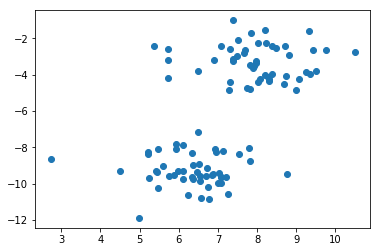

In [4]:
#before assigning cluster
plt.scatter(X[:,0], X[:,1])

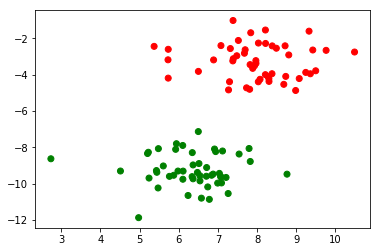

In [5]:
#after assigning clusters
plt.scatter(X[:,0], X[:,1], c = y, cmap = ListedColormap(('red', 'green')))

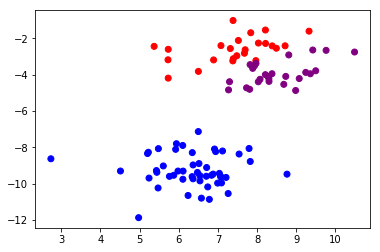

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
y_hat = kmeans.predict(X)
plt.scatter(X[:,0], X[:,1], c = y_hat, cmap = ListedColormap(('red', 'green', 'blue', 'purple')))

### Lets try with 3 clusters

In [12]:
### Make clusters
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=1)

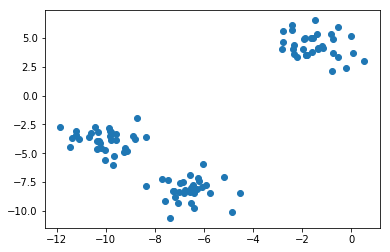

In [13]:
#before assigning cluster
plt.scatter(X[:,0], X[:,1])

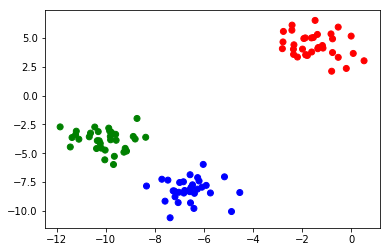

In [14]:
#after assigning clusters
plt.scatter(X[:,0], X[:,1], c = y, cmap = ListedColormap(('red', 'green', 'blue')))

### Lets try k-means

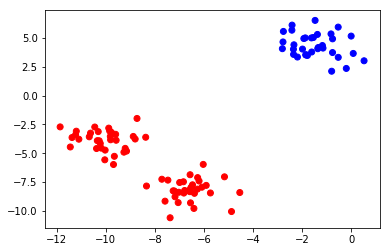

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
y_hat = kmeans.predict(X)
plt.scatter(X[:,0], X[:,1], c = y_hat, cmap = ListedColormap(('red', 'green', 'blue')))

### Harder version of 3 clusters

In [17]:
# 3 clusters Harder
### Make clusters
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=2)

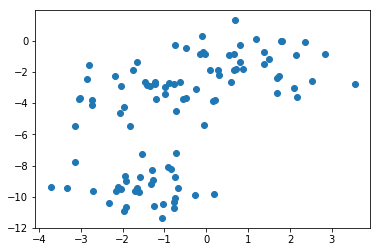

In [18]:
#before assigning cluster
plt.scatter(X[:,0], X[:,1])

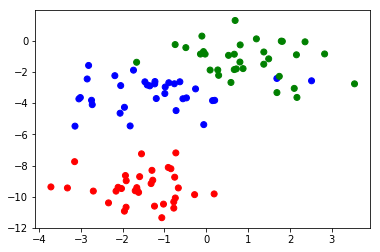

In [19]:
#after assigning clusters
plt.scatter(X[:,0], X[:,1], c = y, cmap = ListedColormap(('red', 'green', 'blue')))

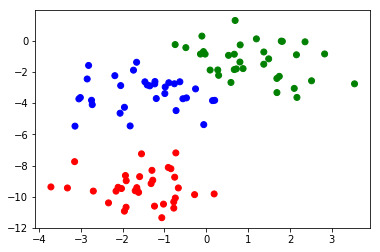

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
y_hat = kmeans.predict(X)
plt.scatter(X[:,0], X[:,1], c = y_hat, cmap = ListedColormap(('red', 'green', 'blue')))

### try an even harder example

In [21]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=55)

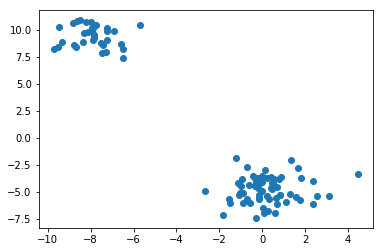

In [22]:
#before assigning cluster
plt.scatter(X[:,0], X[:,1])

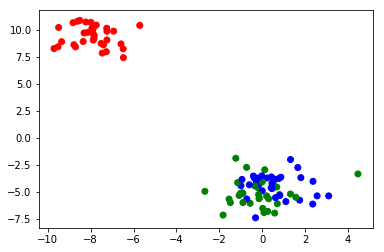

In [23]:
#after assigning clusters
plt.scatter(X[:,0], X[:,1], c = y, cmap = ListedColormap(('red', 'green', 'blue')))

### Lets look at what k-means thinks

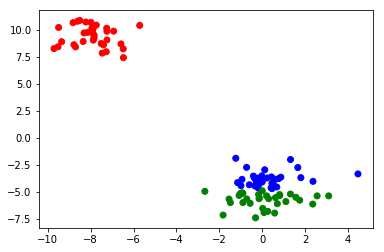

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
y_hat = kmeans.predict(X)
plt.scatter(X[:,0], X[:,1], c = y_hat, cmap = ListedColormap(('red', 'green', 'blue')))

### Lets try with circles

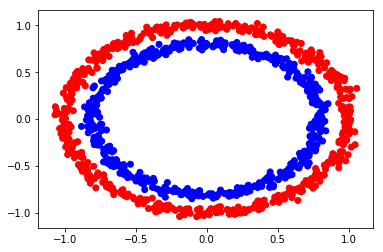

In [25]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, noise=0.03, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y, cmap = ListedColormap(('red', 'blue')))

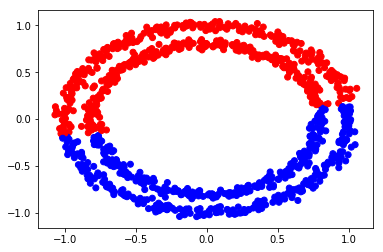

In [29]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
y_hat = kmeans.predict(X)
plt.scatter(X[:,0], X[:,1], c = y_hat, cmap = ListedColormap(('red', 'blue')))

In [ ]:
### We can see that kmeans is not the best way to cluster this type of data

# Assignment: Try to guess how many clusters are in this graph

In [30]:
import pickle
#from sklearn.datasets.samples_generator import make_blobs
#X, y = make_blobs(n_samples=100, centers=5678, n_features=2, random_state=55)
#with open('clusters.pickle', 'wb') as f:
#    pickle.dump([X, y], f)
    
with open('clusters.pickle', 'rb') as f:
    X, y = pickle.load(f)
    y = None

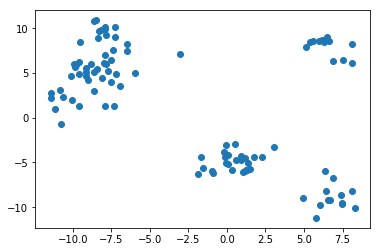

In [31]:
#after assigning clusters
plt.scatter(X[:,0], X[:,1])

### Try to see what kmeans thinks

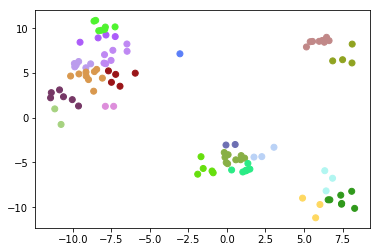

In [35]:
kmeans = KMeans(n_clusters=20, random_state=0).fit(X)
y_hat = kmeans.predict(X)
plt.scatter(X[:,0], X[:,1], c = y_hat, cmap = ListedColormap(generateColors(1000)))

# Genetic Algorithm

In [43]:
#genetic algorithm
import numpy as np
#Try to change this:
ref = "3.14159265359"

try:
    from randomstate.prng.pcg64 import RandomState
except ImportError:
    print ("""Importing randomstate failed. To fix, try:
    sudo pip install randomstate OR conda install -c dhirschfeld randomstate""")
    import sys
    sys.exit()

gene_bases = [base for base in ' ABCDEFGHIJKLMNOPQRSTUVWXYZ!?@#$%^&*().1234567890']

random_seed = 3

size_of_generation = 100
prngs = [RandomState(random_seed, i) for i in range(size_of_generation)]

def mutate(gene, prng, mutation_rate=0.05):
    copy = ''
    for base in gene:
        if prng.uniform() < mutation_rate:
            copy += prng.choice(gene_bases)
        else:
            copy += base
    return copy


def fitness(gene, reference=ref):
    return sum([1 for base, ref_base in zip(gene, reference) if base == ref_base])

def new_population(parent, mutation_rate=0.05):
    return [mutate(parent, prng, mutation_rate=mutation_rate) for prng in prngs]

def best_in_population(population):
    """return the fittest individual in the population"""
    return population[np.argmax([fitness(individual) for individual in population])]

def get_next_parent(parent, mutation_rate=0.05):
    """evolve a new population from the parent, and find the new fittest individual"""
    return best_in_population(new_population(parent, mutation_rate=mutation_rate))

def weasel_program(mutation_rate=0.05,initial=' '*len(ref)):#must be same size as text we want
    generation = 0
    score = fitness(initial)
    parent = initial
    while score < len(parent):
        print ('%3d  %s  (%d)' % (generation, parent, score))
        parent = get_next_parent(parent)
        generation += 1
        score = fitness(parent)
    print ('%3d  %s  (%d)' % (generation, parent, score))

if __name__ == '__main__':
    import time
    start = time.time()
    weasel_program()
    print ('evolution time:', time.time() - start)


  0                 (0)
  1           ?7    (0)
  2           ?P    (0)
  3           ?PW   (0)
  4           ?P5   (1)
  5     4     ?P5   (2)
  6     4    60P5   (3)
  7     41   60P5   (4)
  8     41   60P5   (4)
  9     41   60P53  (4)
 10     41   60P53  (4)
 11     41  560P53  (4)
 12     41  560 53  (4)
 13     41 I263 53  (5)
 14     41 I263 53  (5)
 15     41 E265(53  (6)
 16     41 E265(53  (6)
 17     41 E265(53  (6)
 18  E U41 9265(53  (7)
 19  E U41#9265353  (8)
 20  E U41#9265353  (8)
 21  E U41#926535I  (8)
 22  E U41#926535I  (8)
 23  E U41#926535I  (8)
 24  3 ^41#926535I  (9)
 25  3.^41#926535I  (10)
 26  3.^41#926535I  (10)
 27  3.^41#926535I  (10)
 28  3.^41#926535I  (10)
 29  3.^41#926535I  (10)
 30  3.^41#926535I  (10)
 31  3.^41#926535I  (10)
 32  3.^41#926535I  (10)
 33  3.^41#926535I  (10)
 34  3.141#926535I  (11)
 35  3.141#926535I  (11)
 36  3.141#926535I  (11)
 37  3.141#926535I  (11)
 38  3.141#926535I  (11)
 39  3.141#926535I  (11)
 40  3.141#926535I  (11)
